In [14]:
import plotly.express as px
import plotly.graph_objects as go

df = px.data.gapminder()

# px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
#            size="pop", color="continent", hover_name="country",
#            log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [74]:
print("Keys: ", df.keys())
print("size: ", df.shape)

df["year"].unique()

df.shape[0]

Keys:  Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')
size:  (1704, 8)


1704

In [28]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play_label",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

In [73]:
import plotly.graph_objects as go

import numpy as np

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
        #              line=dict(width=2, color="blue")),
        #   go.Scatter(x=x, y=y,
        #              mode="lines",
                     line=dict(width=2, color="green"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
)

# frames=[go.Frame(
#         data=[go.Scatter(
#             x=xx[0:k],
#             y=yy[0:k],
#             mode="lines",
#             marker=dict(color="red", size=5))])

#         for k in range(N)]


frames = []
for k in range(N):
    frames.append(go.Frame(
        data=[go.Scatter(
            x=xx[0:k],
            y=yy[0:k],
            mode="lines",
            marker=dict(color="red", size=5))]))


fig.update(frames=frames)

fig.show()


In [63]:
import pandas as pd

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5


# create dataframe
df_curve = pd.DataFrame(dict(x=x, y=y, t=t))

fig = px.scatter(df_curve, x="x", y="y", 
        animation_frame="t", range_x=[xm, xM], range_y=[ym, yM])
fig.add_trace(go.Scatter(x=x, y=y,))

# fig.update_layout(transition = {'duration': 0})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100

fig.show()

In [75]:
# https://community.plotly.com/t/how-to-simultaneously-animate-multiple-traces-of-the-same-figure/64541/4

import plotly.graph_objects as go
import numpy as np
#from plotly.offline import iplot
def rndata():
    return np.random.randint(1,10,10)

n_frames=10
my_colors = ["RoyalBlue", "#09ffff", "#19d3f3", "#e763fa", "#ab63fa", 
             "#636efa", "#00cc96", "#EF553B", "#119DFF", "#0D76BF" ]    

my_symbols= ['circle', 'circle-open', 'cross', 'diamond',
            'diamond-open', 'square', 'square-open', 'x', 'circle', 'diamond']

fig = go.Figure(go.Scatter3d(x=rndata(),y=rndata(),z=rndata(), name='Nodes1',  mode="lines",
                             line_color="RoyalBlue", line_width=2
                             ))
fig.add_scatter3d(x=rndata(),y=rndata(),z=rndata(), 
                  mode="markers", marker_symbol=["circle"]*10, 
                  name='Nodes2', marker_size=6)

frames = []

for k in range(n_frames):
    frames.append(go.Frame(data=[go.Scatter3d(z=rndata(), line_color=my_colors[k]),
                                 go.Scatter3d(marker_symbol=[my_symbols[k]]*10)],
                           traces=[0,1], #This means that the above trace updates (within go.Frame definition)
                                         #are performed for fig.data[0], fig.data[1]
                           name=f"fr{k}"))      
    

fig.update(frames=frames)
updatemenus = [dict(
        buttons = [
            dict(
                args = [None, {"frame": {"duration": 500, "redraw": True},
                                "fromcurrent": True}],
                label = "Play",
                method = "animate"
                ),
            dict(
                 args = [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                label = "Pause",
                method = "animate"
                )
        ],
        direction = "left",
        pad = {"r": 10, "t": 87},
        showactive = False,
        type = "buttons",
        x = 0.1,
        xanchor = "right",
        y = 0,
        yanchor = "top"
    )]  

sliders = [dict(steps = [dict(method= 'animate',
                              args= [[f'frame{k}'],                           
                              dict(mode= 'immediate',
                                   frame= dict(duration=400, redraw=True),
                                   transition=dict(duration= 10))
                                 ],
                              label=f'{k+1}'
                             ) for k in range(n_frames)], 
                active=0,
                transition= dict(duration= 0 ),
                x=0, # slider starting position  
                y=0, 
                currentvalue=dict(font=dict(size=12), 
                                  prefix='frame: ', 
                                  visible=True, 
                                  xanchor= 'center'
                                 ),  
                len=1.0) #slider length
           ]
fig.update_layout(width=600, height=600,  
                  
                  updatemenus=updatemenus,
                  sliders=sliders)
fig.show()

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
import io
import PIL

r = np.random.RandomState(42)

# sample data
df = pd.DataFrame(
    {
        "step": np.repeat(np.arange(0, 8), 10),
        "x": np.tile(np.linspace(0, 9, 10), 8),
        "y": r.uniform(0, 5, 80),
    }
)

# smaple plotly animated figure
fig = px.bar(df, x="x", y="y", animation_frame="step")

# generate images for each step in animation
frames = []
for s, fr in enumerate(fig.frames):
    # set main traces to appropriate traces within plotly frame
    fig.update(data=fr.data)
    # move slider to correct place
    fig.layout.sliders[0].update(active=s)
    # generate image of current state
    # frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))

    fig.write_image("test" + str(s) + ".png")
    
# # create animated GIF
# frames[0].save(
#         "test.gif",
#         save_all=True,
#         append_images=frames[1:],
#         optimize=True,
#         duration=500,
#         loop=0,
#     )

# Exporting png
Two backend of plotly write_image:
* kaleido
* orca

Initializing orca is a bit slower than kaleido, however, it's much faster for the second output.


In [1]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=go.scatter.Marker(
        size=sz,
        color=colors,
        opacity=0.6,
        colorscale="Viridis"
    )
))

fig.show()

import os

if not os.path.exists("images"):
    os.mkdir("images")

In [2]:
fig.write_image("Image/test/test_kaleido.png", engine='kaleido')

In [3]:
import plotly.io as pio
# pio.orca.config.mathjax = 'local'

print(pio.orca.config)
print(pio.orca.status)

# fig.to_image(format="png", engine='orca')


orca configuration
------------------
    server_url: None
    executable: orca
    port: None
    timeout: None
    default_width: None
    default_height: None
    default_scale: 1
    default_format: png
    mathjax: https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js
    topojson: None
    mapbox_access_token: None
    use_xvfb: auto

constants
---------
    plotlyjs: d:\Dropbox (University of Michigan)\Side Hustles\TraceVis\.conda\lib\site-packages\plotly\package_data\plotly.min.js
    config_file: C:\Users\f8503\.plotly\.orca


orca status
-----------
    state: unvalidated
    executable: None
    version: None
    port: None
    pid: None
    command: None




In [6]:
from IPython.display import Image

img_byte = pio.to_image(fig, format="png", engine='orca')
# display(Image(img_byte))

fig.write_image("Image/test/test_orca.png", engine='orca')

orca status
-----------
    state: running
    executable: d:\Dropbox (University of Michigan)\Side Hustles\TraceVis\.conda\orca.CMD
    version: 1.3.1
    port: 52452
    pid: 24200
    command: ['d:\\Dropbox (University of Michigan)\\Side Hustles\\TraceVis\\.conda\\orca.CMD', 'serve', '-p', '52452', '--plotly', 'd:\\Dropbox (University of Michigan)\\Side Hustles\\TraceVis\\.conda\\lib\\site-packages\\plotly\\package_data\\plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js']




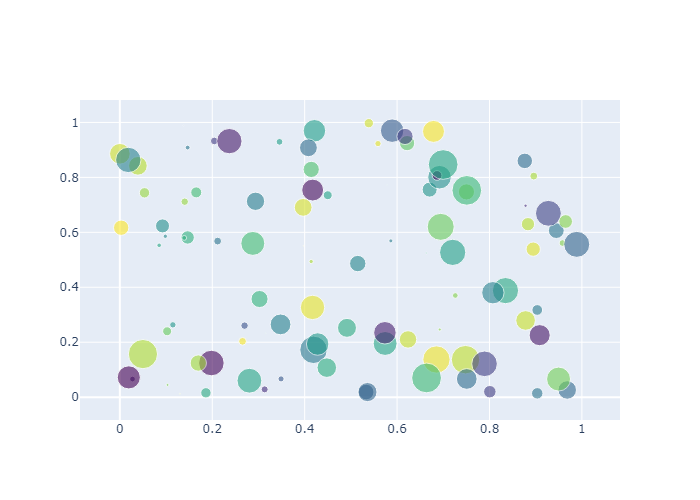

In [5]:
print(pio.orca.status)

img_byte = pio.to_image(fig, format="png", engine='orca')
# display(Image(img_byte))